In [5]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [6]:
df = sns.load_dataset('iris')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

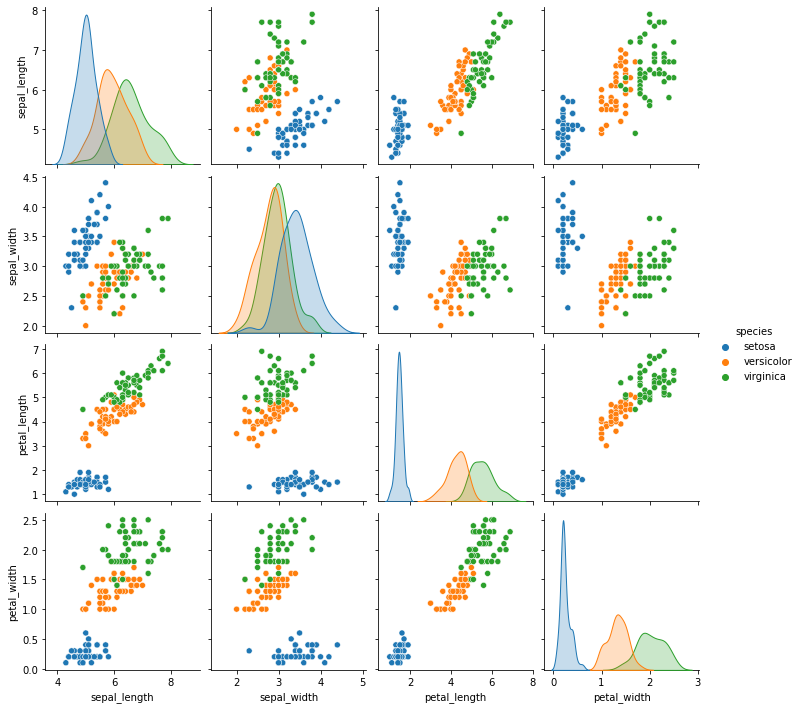

In [10]:
sns.pairplot(df,hue="species");

In [13]:
model = KMeans(n_clusters=3, random_state=170)
clusters = model.fit_predict(df.drop(['species'],axis = 1))
df['clusters'] = clusters

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [12]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,1


In [18]:
df.groupby("clusters").mean()

,sepal_length,sepal_width,petal_length,petal_width
clusters,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


In [19]:
list(df.columns)[:-2]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

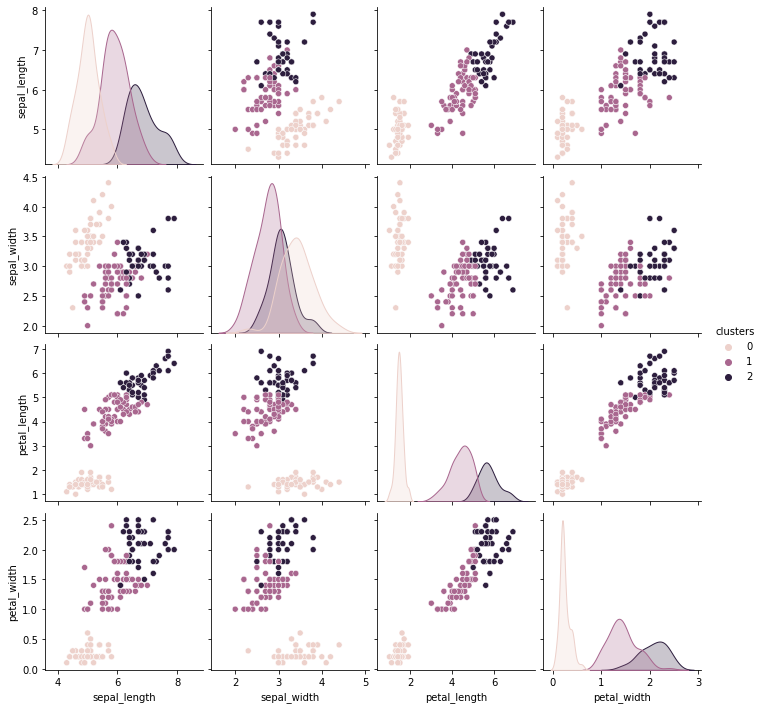

In [20]:
sns.pairplot(df,hue="clusters",vars=list(df.columns)[:-2])

In [21]:
pd.crosstab(df.species,df.clusters)

clusters,0,1,2
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


## GMMs (Gaussian Mixture Models)
In this approach we describe each cluster by its centroid (mean), covariance , and the size of the cluster(Weight).<br>
rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

In [39]:
from sklearn.mixture import GaussianMixture

df = sns.load_dataset('iris')
iris = df.drop(['species'],axis=1)
estimator = GaussianMixture(n_components=3, max_iter=200, random_state=0)
estimator.means_init = np.array([iris[df.species == i].mean(axis=0) for i in ["setosa","versicolor","virginica"]])
pred = estimator.fit_predict(iris)


In [40]:
iris[df.species == "setosa"].mean(axis=0)

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

In [41]:
iris[df.species == 'setosa'].mean(axis=0)

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

In [42]:
pd.crosstab(df.species,pred)

col_0,0,1,2
species,,,
setosa,50,0,0
versicolor,0,45,5
virginica,0,0,50


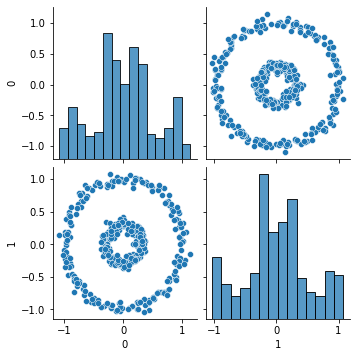

In [43]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=400, factor=.3,noise=.05,random_state=42)
circle = pd.DataFrame(X)
sns.pairplot(circle)

In [44]:
X[:5]

array([[ 0.26102383,  0.12253848],
       [-0.24508728,  0.2022703 ],
       [ 0.48947133,  0.88264316],
       [ 0.36850544,  0.05574328],
       [-0.98127649,  0.19383238]])

In [45]:
y[:5]

array([1, 1, 0, 1, 0])

In [46]:
circle.head()

,0,1
0,0.261024,0.122538
1,-0.245087,0.202270
2,0.489471,0.882643
3,0.368505,0.055743
4,-0.981276,0.193832


In [57]:
clusters = KMeans(n_clusters=2, random_state=170).fit_predict(circle)
circle["clusters"] = clusters

/Users/igal.nir/opt/anaconda3/envs/ds009/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [58]:
circle.head()

,0,1,clusters
0,0.323139,-0.043065,0
1,-0.688313,-0.669704,0
2,-0.250650,-0.218973,0
3,-0.206483,-0.304696,0
4,0.660952,-0.840442,0


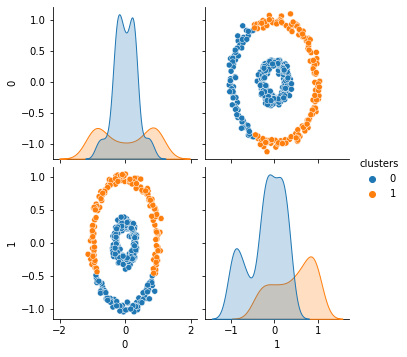

In [59]:
sns.pairplot(circle,hue="clusters",vars=list(circle.columns)[:-1])

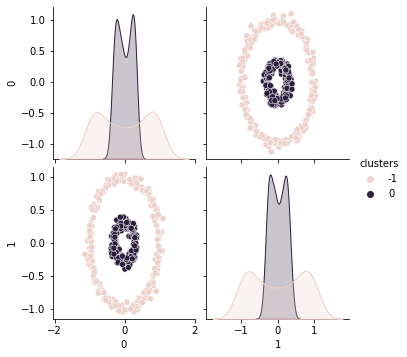

In [73]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=400, factor=.3, noise=.05,random_state=1)
circle = pd.DataFrame(X)
model = DBSCAN(eps=0.5,min_samples=80)
DB_clusters = model.fit_predict(circle)
circle["clusters"] = DB_clusters
sns.pairplot(circle,hue="clusters",vars=list(circle.columns)[:-1])

In [ ]:
# try to get more than 5 clusters

In [61]:
set(model.labels_)

{-1, 0}